In [22]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image
import math
import operator as op

In [2]:
#Leeemos la imagen
plt.rcParams['image.cmap'] = 'gray'
fourier = io.imread('images/fourier_bw512.bmp') #Imagen de Fourier

#Funcion para plotear de volon pimpon
def plot(objeto):
    plt.imshow(objeto)


In [70]:
#Ejercicio 1

Tf = np.fft.fft2(fourier) #Discreta
sTf= np.fft.fftshift(Tf)

def magnitud(img):
    parte_realTf= abs(img) #Magnitud
    return parte_realTf
def fase(img):
    fase_Tf= np.angle(img) #Fase
    return fase_Tf
def amplitud(img):
    amplitud_Tf= np.log(1+img)
    return amplitud_Tf

def i_amp(img):
    IAmplitud = np.fft.ifft2(img)
    IAmplitud = abs(IAmplitud)
    return IAmplitud

def i_fase(img):    
    IFase = np.fft.ifft2(np.exp(1*img))
    IFase = abs(IFase)
    return IFase

In [73]:
magF = magnitud(Tf)
smagF = magnitud(sTf)
#-------
faseF = fase(Tf)
sfaseF = fase(sTf)
#-------
ampF = amplitud(magF)
sampF = amplitud(smagF)
#-------
iAmpF = i_amp(magF)
siAmpF = i_amp(smagF)
#-------
iFasF = i_fase(faseF)
siFasF = i_fase(sfaseF)

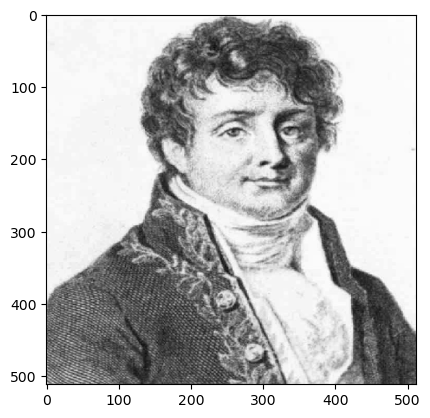

In [4]:
#Platemos Fourier normalillo

plot(fourier)

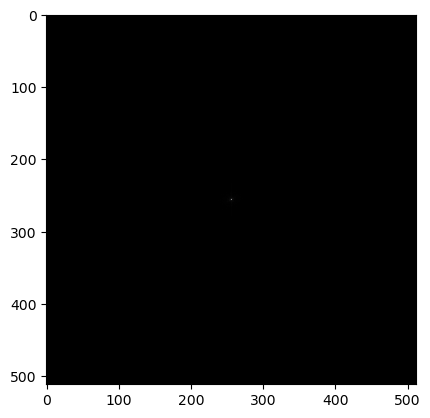

In [42]:
#Ploteamos Magnitud
plot(smagF)

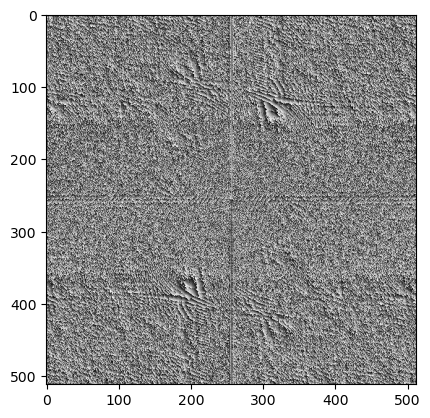

In [46]:
#Ploteamos Fase

plot(sfaseF)

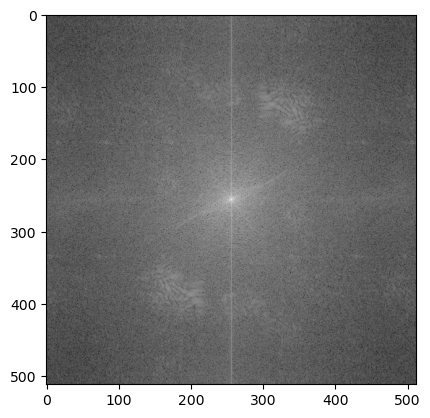

In [54]:
# Ploteamos Amplitud
plot(sampF)

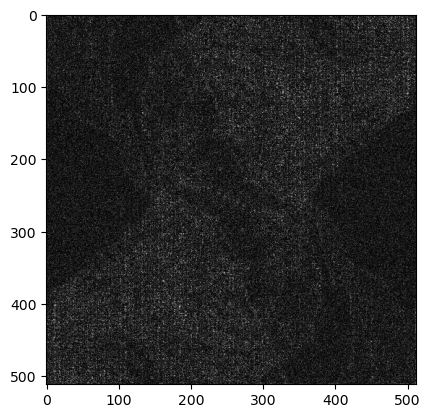

In [72]:
plot(iFasF)

In [74]:
# Ejercicio 2
def butterworth(img,Dx,n,filtro):
    c,r = img.shape
    u = np.arange(r)
    v = np.arange(c)
    u,v = np.meshgrid(u,v) # matriz de u y v
    forma = np.sqrt((u- (r/2))**2+ (v- (c/2))**2)
    d = (1.0 + (forma/Dx)**(2*n))
    tras_Fourier = np.fft.fftshift(np.fft.fft2(img)) #Fourier
    con_filtro = op.mul(tras_Fourier,filtro(d))
    Icon_filtro = np.fft.ifft2(np.fft.ifftshift(con_filtro)).real #Fourier a la inversa
    return Icon_filtro

# Filtro paso bajas
def paso_bajas(d):
    filtro = 1.0/d
    return filtro

# Filtro paso altas
def paso_altas(d):
    filtro = 1-(1.0/d)
    return filtro


#Ruido sal y pimienta
def rSalPim(imagen):
    s= imagen.copy()/255
    y, x= imagen.shape
    pimienta=0.005
    sal= 1- pimienta
    for ren in range(y):
        for col in range(x):
            rnd= np.random.random()
            if rnd < pimienta:
                s[ren][col]=0
            elif rnd > sal:
                s[ren][col]=1
    return s/255
    

In [75]:
fourier_syp = rSalPim(fourier) 

In [80]:
# Imagen sin ruido
btw_bajas = butterworth(fourier,20,2,paso_bajas)
btw_altas = butterworth(fourier,20,2,paso_altas)

# Imagen con ruido
rbtw_bajas = butterworth(fourier_syp,145,2,paso_bajas)
rbtw_altas = butterworth(fourier_syp,145,2,paso_altas)

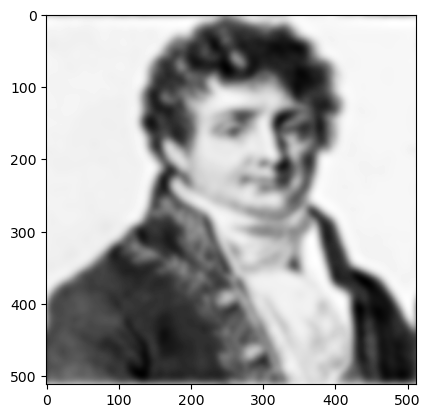

In [81]:
plot(btw_bajas)

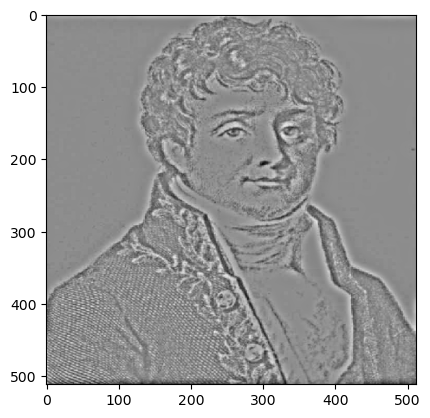

In [82]:
plot(btw_altas)